# Processing notebook: preparing the draft for IoT Edge Device's main

## L3 regridded data

### Setting up project root for module imports in Jupyter Notebook

In [1]:
# Import the os module to work with the file system
import os

# Get the absolute path of the current notebook.
# This assumes the notebook's name is "L3_tour.ipynb".
# Note: "L3_tour.ipynb" is located in the "notebooks" folder of the "oceanstream" repo.
# This folder is typically ignored to maintain a clear organization of the project.

notebook_path = os.path.abspath("L3_tour.ipynb")
print(f"notebook_path: {notebook_path}")
# Navigate up two directories from the notebook's path to get to the project root
# os.pardir represents the parent directory, so using it twice moves up two levels
project_root = os.path.abspath(os.path.join(notebook_path, os.pardir, os.pardir))

# Print the project root path to verify
print(f"project_root: {project_root}")

# Import the sys module to modify the Python path
import sys

# Append the project root to the Python path so that modules from the project can be imported
sys.path.append(project_root)

notebook_path: /Users/simedroniraluca/Documents/pineview/oceanstream/notebooks/L3_tour.ipynb
project_root: /Users/simedroniraluca/Documents/pineview/oceanstream


Specifies the path to the test data utilized in this notebook:

In [2]:
# The L3 layer utilizes the data that has been processed in the `L2-calibrated data` layer.
L2_tour_data_path = os.path.join(project_root, "test_data", "L2_tour_data")

### Read the data that has been processed  in the `L2-calibrated data` layer

In [3]:
from oceanstream.L2_calibrated_data import processed_data_io

noise_free_EK60_ds = processed_data_io.read_processed(file_path=os.path.join(L2_tour_data_path, 'noise_free_EK60.nc'))

In [4]:
noise_free_EK60_ds

<xarray.Dataset>
Dimensions:                        (channel: 3, ping_time: 1932,
                                    range_sample: 1055, filenames: 1)
Coordinates:
  * channel                        (channel) object 'GPT  18 kHz 009072058c8d...
  * ping_time                      (ping_time) datetime64[ns] 2017-06-20T01:1...
  * range_sample                   (range_sample) int64 0 1 2 ... 1052 1053 1054
  * filenames                      (filenames) int64 0
Data variables: (12/28)
    Sv_with_background_noise       (channel, ping_time, range_sample) float64 ...
    echo_range                     (channel, ping_time, range_sample) float64 ...
    frequency_nominal              (channel) float64 1.8e+04 3.8e+04 1.2e+05
    sound_speed                    (channel, ping_time) float64 1.481e+03 ......
    sound_absorption               (channel, ping_time) float64 0.002822 ... ...
    sa_correction                  (ping_time, channel) float64 -0.83 ... -0.34
    ...                             ...
    mask_impulse                   (channel, ping_time, range_sample) bool Fa...
    mask_attenuation               (channel, ping_time, range_sample) bool Fa...
    mask_seabed                    (channel, ping_time, range_sample) bool Tr...
    mask_false_seabed              (channel, ping_time, range_sample) bool Tr...
    Sv_noise                       (channel, ping_time, range_sample) float64 ...
    Sv                             (channel, ping_time, range_sample) float64 ...
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.1.dev2323+g119e831
    processing_time:              2023-10-09T06:30:52Z
    processing_function:          clean.remove_noise
    processing_level:             Level 3B
    processing_level_url:         https://echopype.readthedocs.io/en/stable/p...
    mask_software_name:           echopype
    mask_software_version:        0.1.dev2323+g119e831
    mask_time:                    2023-10-09T06:30:51Z
    mask_function:                mask.apply_mask

In [5]:
extended_EK80_ds_zarr = processed_data_io.read_processed(file_path=os.path.join(
    L2_tour_data_path, 
    'extended_ds_EK80.zarr')
                                                        )

In [6]:
extended_EK80_ds = processed_data_io.read_processed(file_path=os.path.join(
    L2_tour_data_path, 
    'extended_ds_EK80.nc')
                                                        )

In [7]:
extended_EK80_ds_zarr.identical(extended_EK80_ds)

True

In [8]:
extended_EK80_ds

<xarray.Dataset>
Dimensions:                        (channel: 5, ping_time: 13,
                                    range_sample: 123897, filenames: 1)
Coordinates:
  * channel                        (channel) object 'WBT 545604-15 ES38B' ......
  * ping_time                      (ping_time) datetime64[ns] 2016-11-09T16:3...
  * range_sample                   (range_sample) int64 0 1 2 ... 123895 123896
  * filenames                      (filenames) int64 0
Data variables: (12/30)
    Sv                             (channel, ping_time, range_sample) float64 ...
    echo_range                     (channel, ping_time, range_sample) float64 ...
    frequency_nominal              (channel) float64 3.8e+04 1.8e+04 ... 7e+04
    sound_speed                    float64 1.514e+03
    sound_absorption               (channel) float64 0.007929 ... 0.01852
    temperature                    float64 10.0
    ...                             ...
    depth                          (channel, ping_time, range_sample) float64 ...
    mask_transient                 (channel, ping_time, range_sample) bool Tr...
    mask_impulse                   (channel, ping_time, range_sample) bool Fa...
    mask_attenuation               (channel, ping_time, range_sample) bool Fa...
    mask_seabed                    (channel, ping_time, range_sample) bool Tr...
    mask_false_seabed              (channel, ping_time, range_sample) bool Tr...
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.1.dev2323+g119e831
    processing_time:              2023-10-09T06:29:29Z
    processing_function:          calibrate.compute_Sv

In [9]:
import echopype.visualize as epviz

**Noise free EK60 echogram**

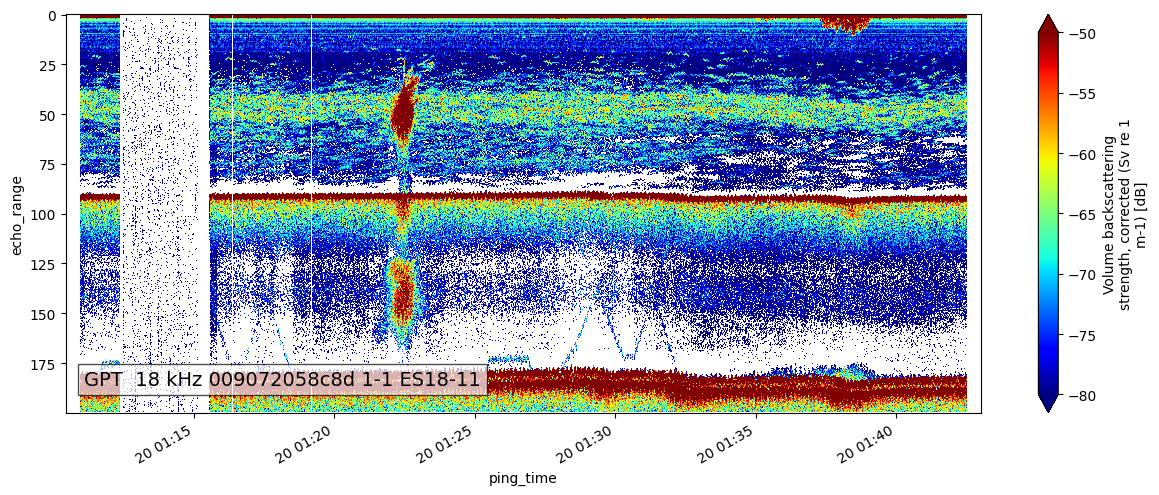

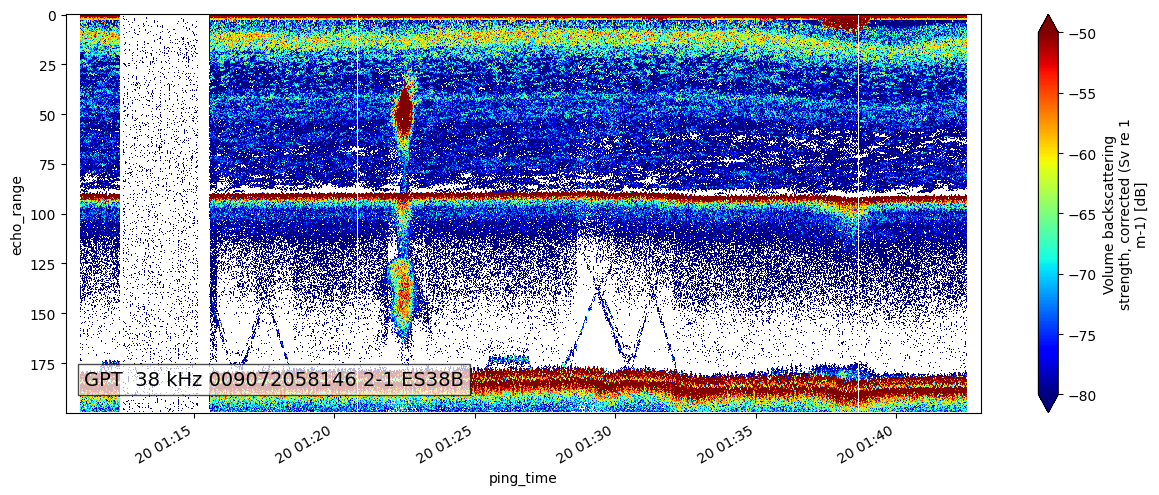

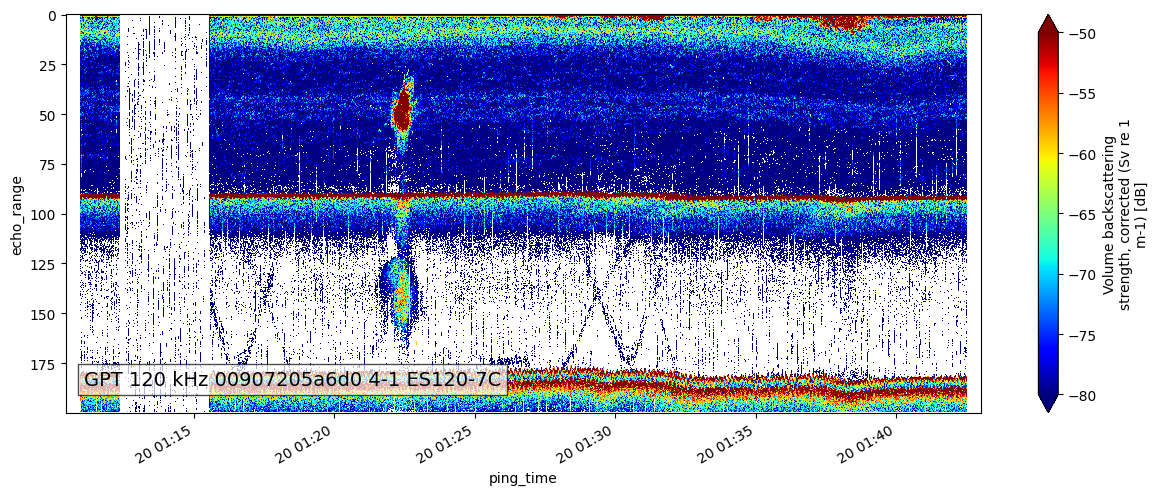

In [10]:
epviz.create_echogram(noise_free_EK60_ds,vmin=-80,vmax=-50)

**EK80 echogram - with noise**

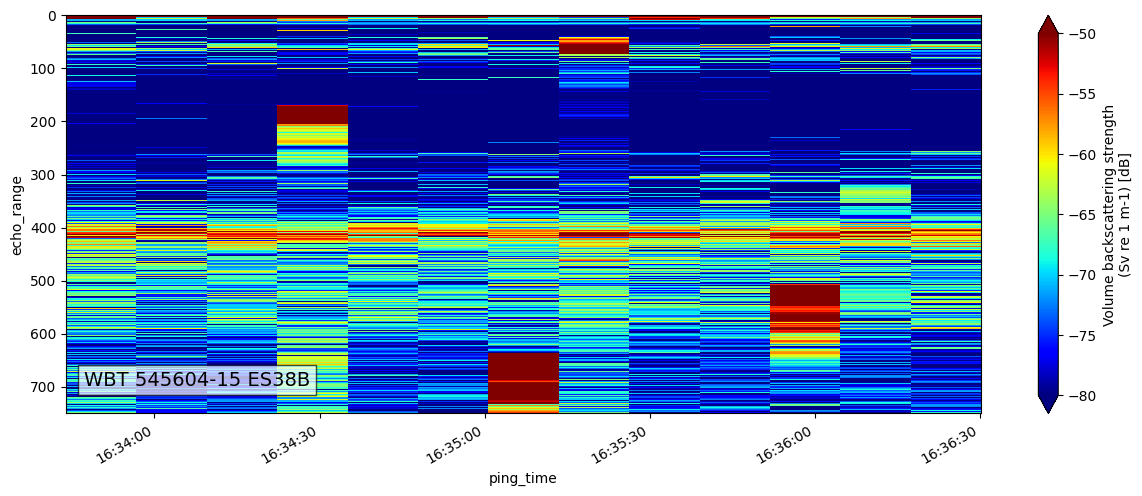

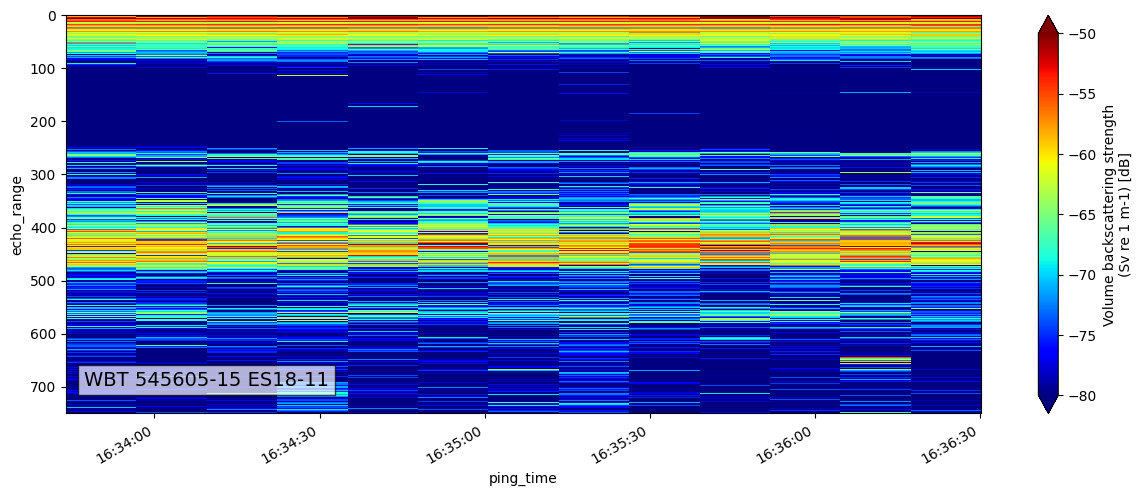

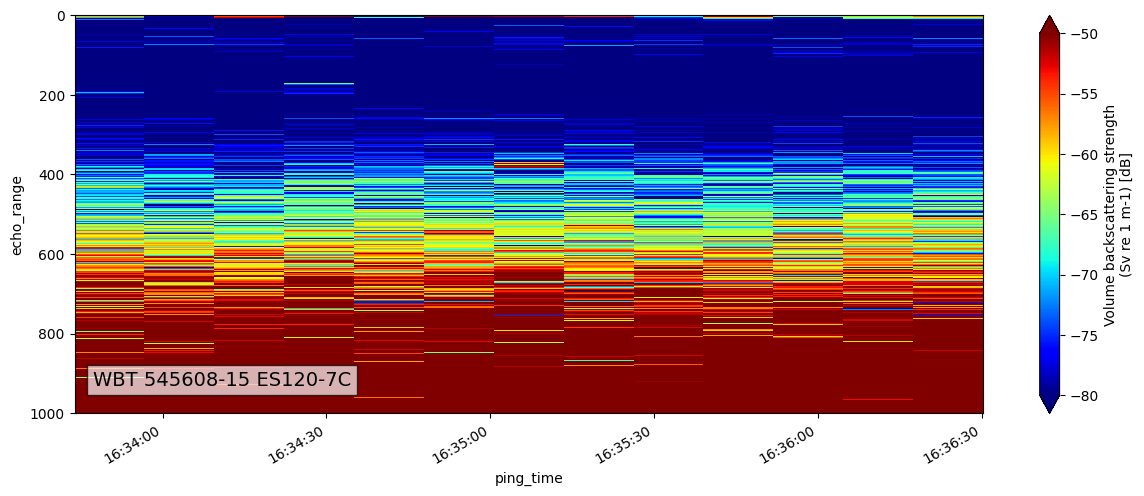

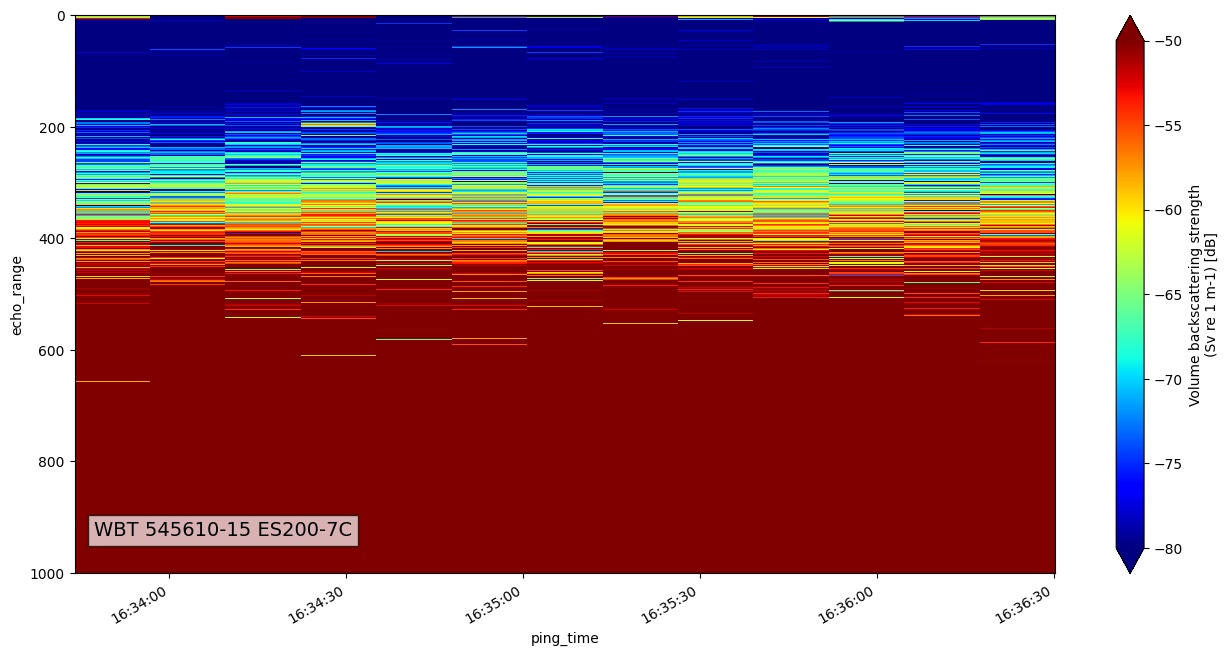

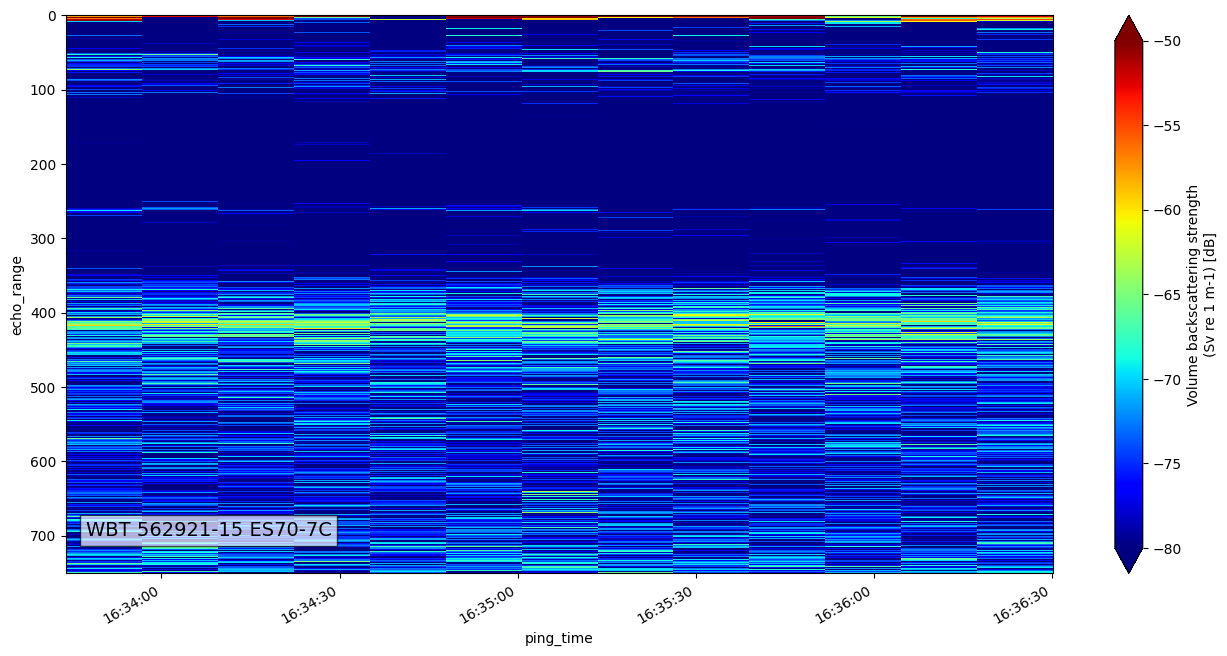

In [11]:
selected_channels = extended_EK80_ds.sel(channel=['WBT 545604-15 ES38B', 'WBT 545605-15 ES18-11', 'WBT 545608-15 ES120-7C'])
epviz.create_echogram(selected_channels,vmin=-80,vmax=-50)
selected_channels = extended_EK80_ds.sel(channel=['WBT 545610-15 ES200-7C', 'WBT 562921-15 ES70-7C'])
epviz.create_echogram(selected_channels,vmin=-80,vmax=-50)

### Use frequency differencing handler

In [12]:
from oceanstream.L3_regridded_data import frequency_differencing_handler

# Identify krill
chan120 = 'GPT 120 kHz 00907205a6d0 4-1 ES120-7C'
chan38 = 'GPT  38 kHz 009072058146 2-1 ES38B'
ds_Sv_krill = frequency_differencing_handler.identify_krill(noise_free_EK60_ds, chan120=chan120, chan38=chan38)

ds_Sv_krill

<xarray.Dataset>
Dimensions:                        (channel: 3, ping_time: 1932,
                                    range_sample: 1055, filenames: 1)
Coordinates:
  * channel                        (channel) object 'GPT  18 kHz 009072058c8d...
  * ping_time                      (ping_time) datetime64[ns] 2017-06-20T01:1...
  * range_sample                   (range_sample) int64 0 1 2 ... 1052 1053 1054
  * filenames                      (filenames) int64 0
Data variables: (12/28)
    Sv_with_background_noise       (channel, ping_time, range_sample) float64 ...
    echo_range                     (channel, ping_time, range_sample) float64 ...
    frequency_nominal              (channel) float64 1.8e+04 3.8e+04 1.2e+05
    sound_speed                    (channel, ping_time) float64 1.481e+03 ......
    sound_absorption               (channel, ping_time) float64 0.002822 ... ...
    sa_correction                  (ping_time, channel) float64 -0.83 ... -0.34
    ...                             ...
    mask_impulse                   (channel, ping_time, range_sample) bool Fa...
    mask_attenuation               (channel, ping_time, range_sample) bool Fa...
    mask_seabed                    (channel, ping_time, range_sample) bool Tr...
    mask_false_seabed              (channel, ping_time, range_sample) bool Tr...
    Sv_noise                       (channel, ping_time, range_sample) float64 ...
    Sv                             (channel, ping_time, range_sample) float64 ...
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.1.dev2323+g119e831
    processing_time:              2023-10-09T06:30:52Z
    processing_function:          clean.remove_noise
    processing_level:             Level 3B
    processing_level_url:         https://echopype.readthedocs.io/en/stable/p...
    mask_software_name:           echopype
    mask_software_version:        0.1.dev2323+g119e831
    mask_time:                    2023-10-09T06:48:10Z
    mask_function:                mask.apply_mask

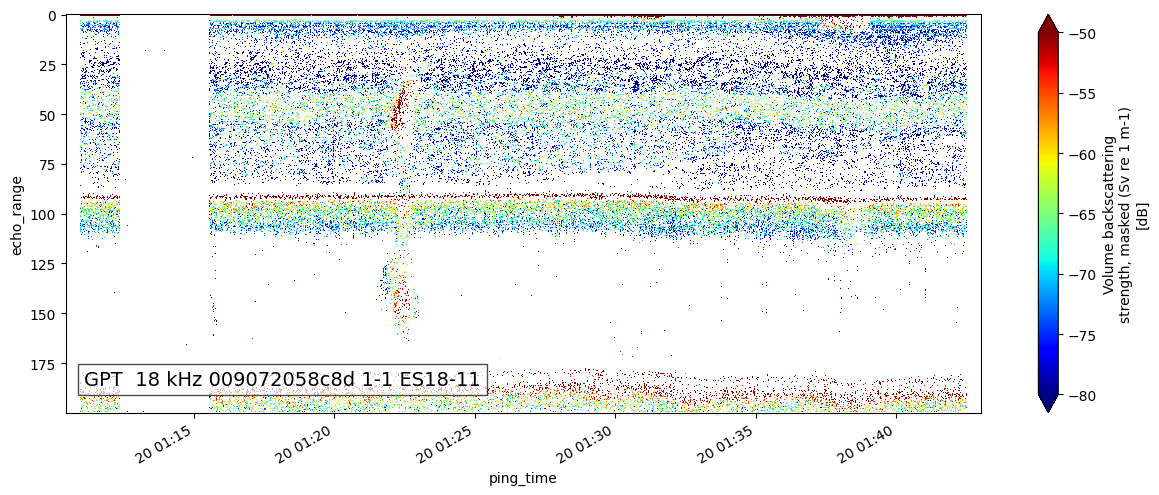

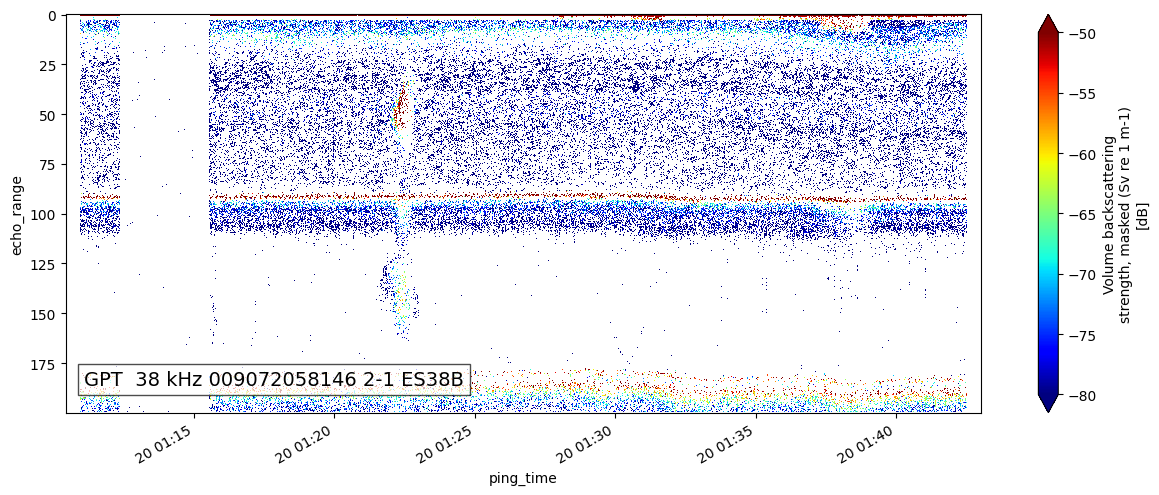

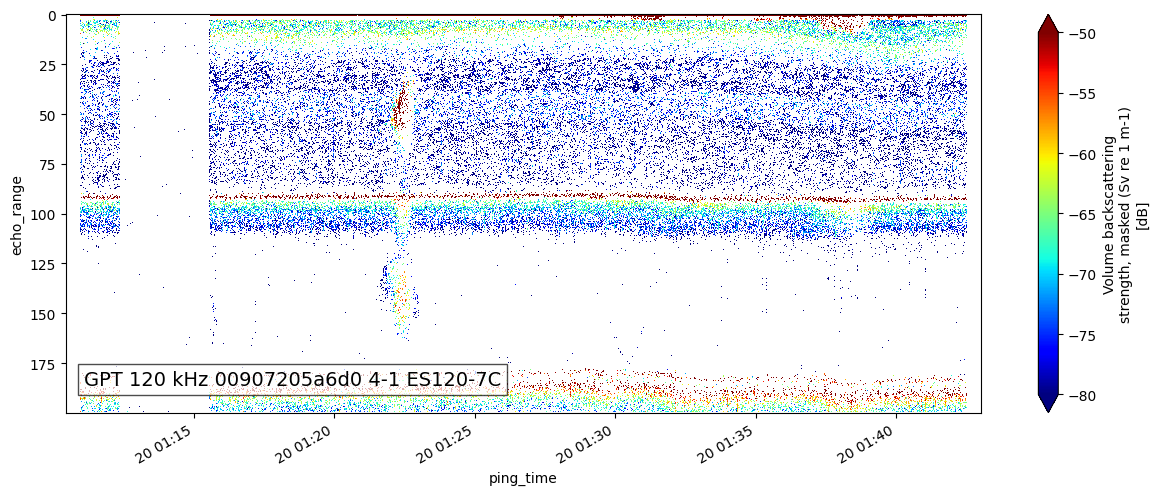

In [13]:
epviz.create_echogram(ds_Sv_krill,vmin=-80,vmax=-50)

In [14]:
# Identify gas bearing organisms
chan120 = 'GPT 120 kHz 00907205a6d0 4-1 ES120-7C'
chan38 = 'GPT  38 kHz 009072058146 2-1 ES38B'
ds_Sv_gas_bearing_organisms = frequency_differencing_handler.identify_gas_bearing_organisms(noise_free_EK60_ds, 
                                                                            chan120=chan120, 
                                                                            chan38=chan38
                                                                           )

ds_Sv_gas_bearing_organisms

<xarray.Dataset>
Dimensions:                        (channel: 3, ping_time: 1932,
                                    range_sample: 1055, filenames: 1)
Coordinates:
  * channel                        (channel) object 'GPT  18 kHz 009072058c8d...
  * ping_time                      (ping_time) datetime64[ns] 2017-06-20T01:1...
  * range_sample                   (range_sample) int64 0 1 2 ... 1052 1053 1054
  * filenames                      (filenames) int64 0
Data variables: (12/28)
    Sv_with_background_noise       (channel, ping_time, range_sample) float64 ...
    echo_range                     (channel, ping_time, range_sample) float64 ...
    frequency_nominal              (channel) float64 1.8e+04 3.8e+04 1.2e+05
    sound_speed                    (channel, ping_time) float64 1.481e+03 ......
    sound_absorption               (channel, ping_time) float64 0.002822 ... ...
    sa_correction                  (ping_time, channel) float64 -0.83 ... -0.34
    ...                             ...
    mask_impulse                   (channel, ping_time, range_sample) bool Fa...
    mask_attenuation               (channel, ping_time, range_sample) bool Fa...
    mask_seabed                    (channel, ping_time, range_sample) bool Tr...
    mask_false_seabed              (channel, ping_time, range_sample) bool Tr...
    Sv_noise                       (channel, ping_time, range_sample) float64 ...
    Sv                             (channel, ping_time, range_sample) float64 ...
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.1.dev2323+g119e831
    processing_time:              2023-10-09T06:30:52Z
    processing_function:          clean.remove_noise
    processing_level:             Level 3B
    processing_level_url:         https://echopype.readthedocs.io/en/stable/p...
    mask_software_name:           echopype
    mask_software_version:        0.1.dev2323+g119e831
    mask_time:                    2023-10-09T06:48:17Z
    mask_function:                mask.apply_mask

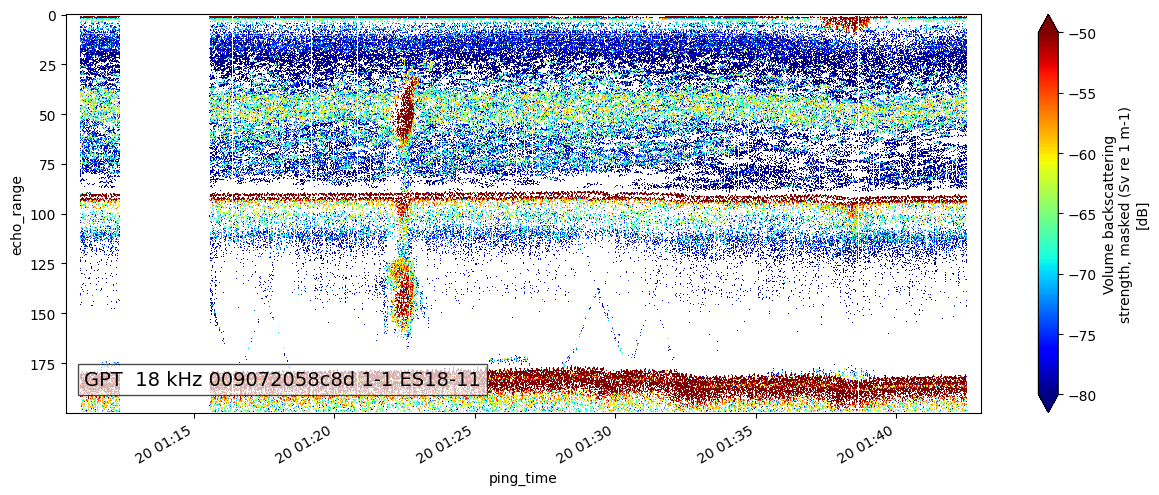

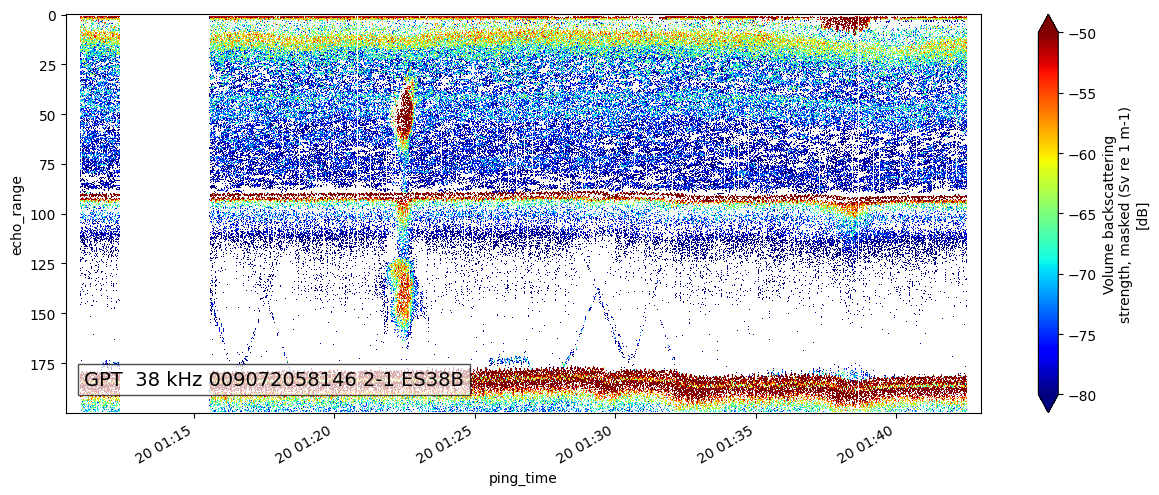

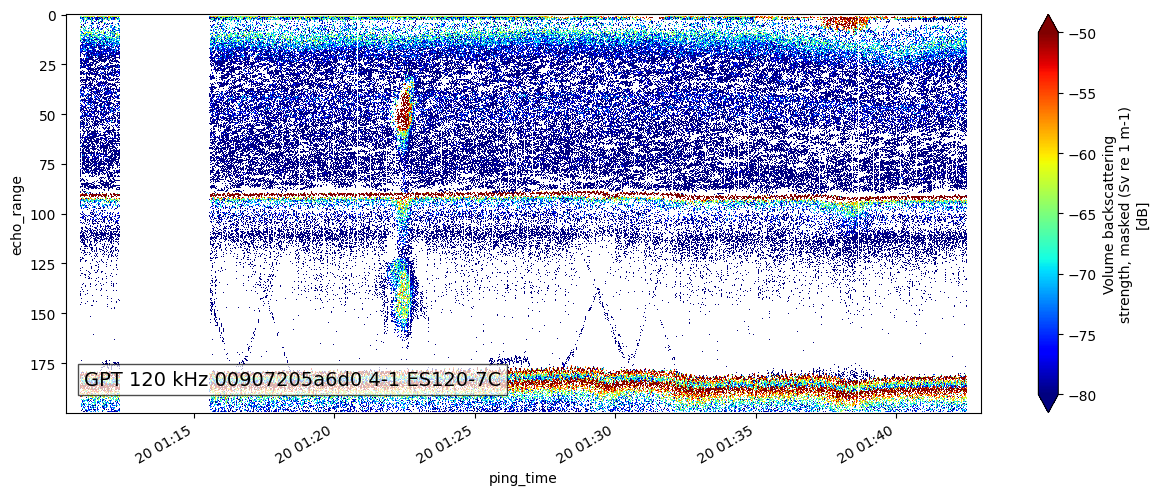

In [15]:
epviz.create_echogram(ds_Sv_gas_bearing_organisms,vmin=-80,vmax=-50)

### Detect shoal

In [16]:
from oceanstream.L3_regridded_data import shoal_detection_handler

mask, mask_ = shoal_detection_handler.create_shoal_mask_multichannel(noise_free_EK60_ds)
combined_masks = shoal_detection_handler.combine_shoal_masks_multichannel(mask, mask_)
ds_Sv_shoal_combined = shoal_detection_handler.apply_shoal_mask(noise_free_EK60_ds, combined_masks)

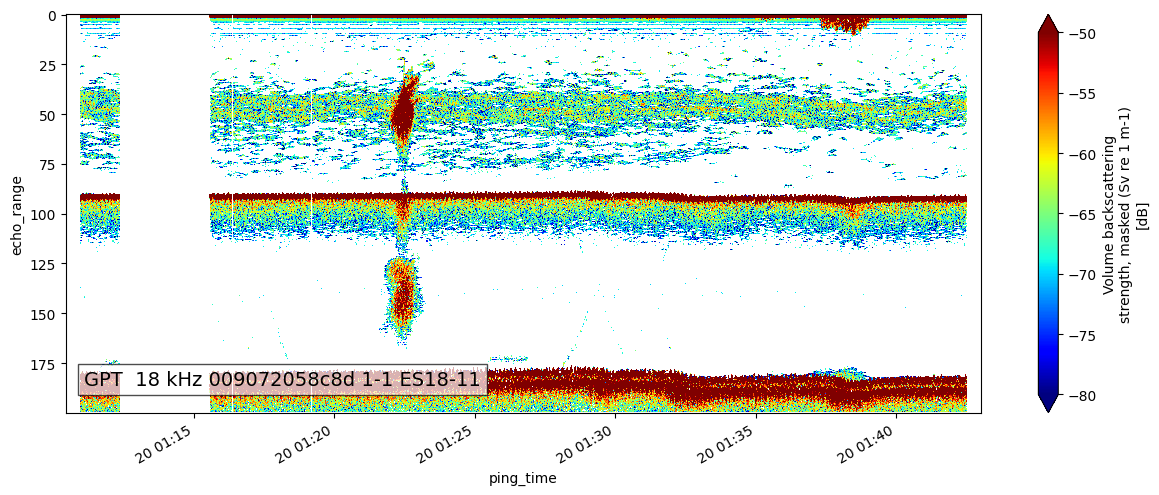

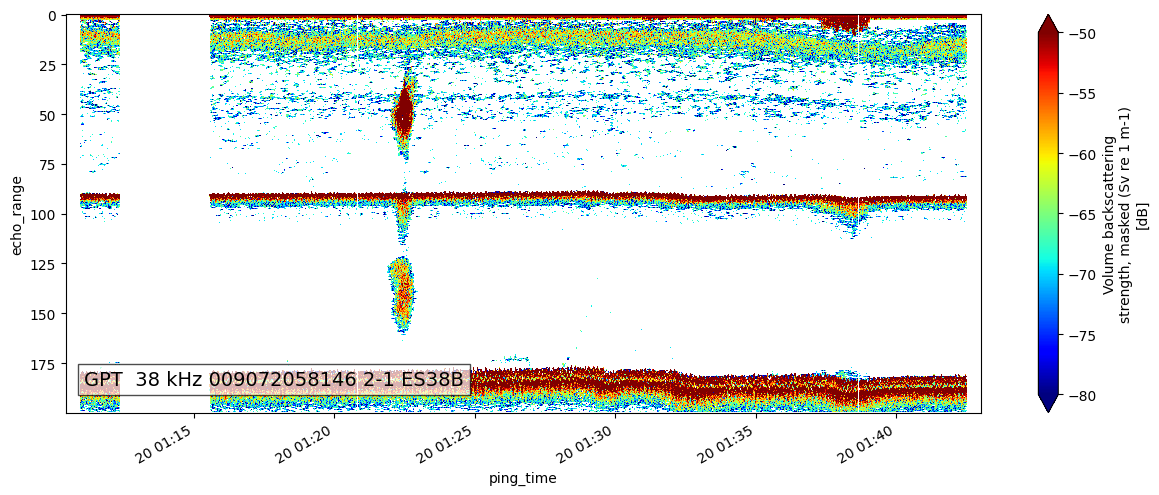

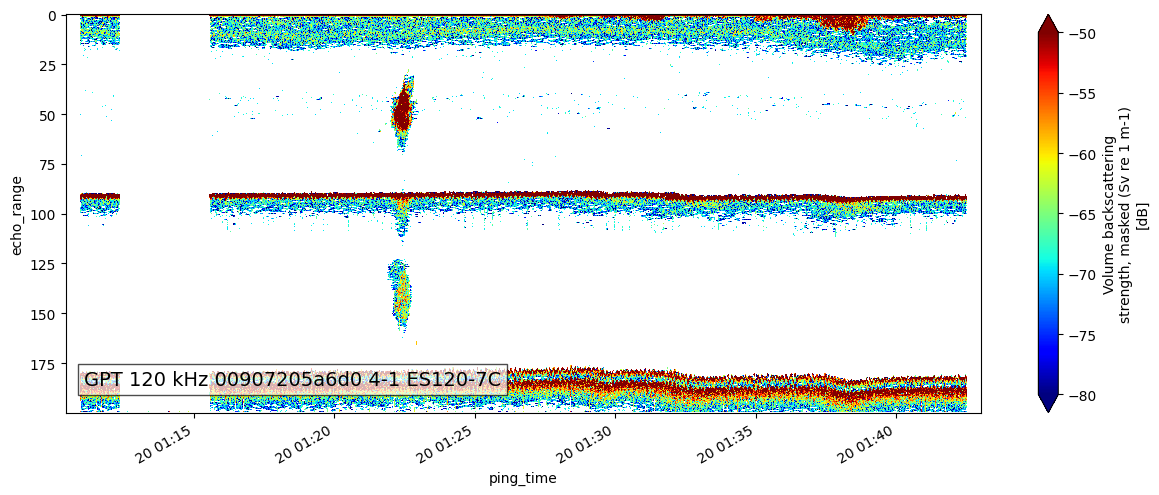

In [17]:
epviz.create_echogram(ds_Sv_shoal_combined, vmin=-80, vmax=-50)

**Krill shoal detection**

In [19]:
krill_mask, krill_mask_ = shoal_detection_handler.create_shoal_mask_multichannel(ds_Sv_krill)
krill_combined_masks = shoal_detection_handler.combine_shoal_masks_multichannel(krill_mask, krill_mask_)
krill_ds_Sv_shoal_combined = shoal_detection_handler.apply_shoal_mask(ds_Sv_krill, combined_masks)

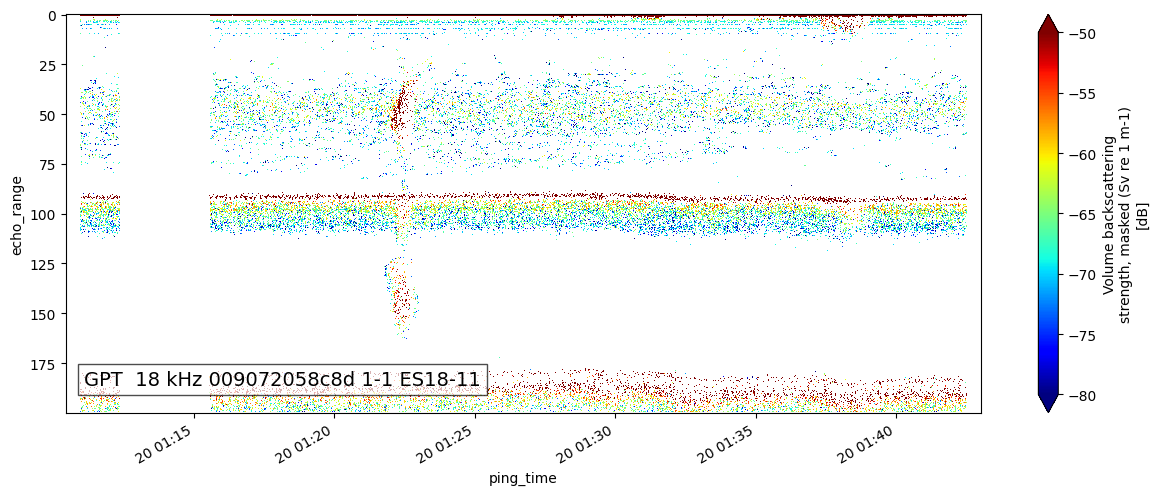

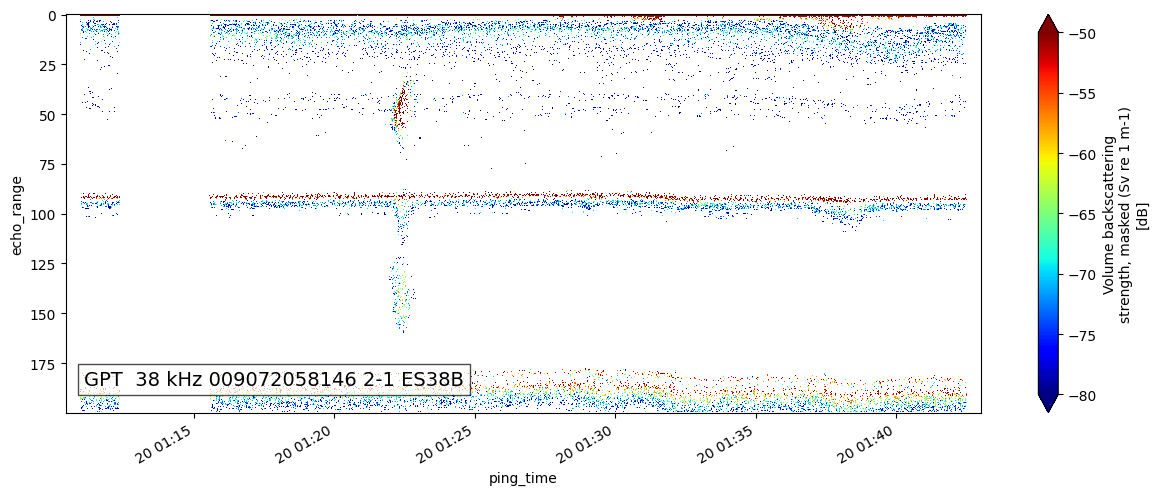

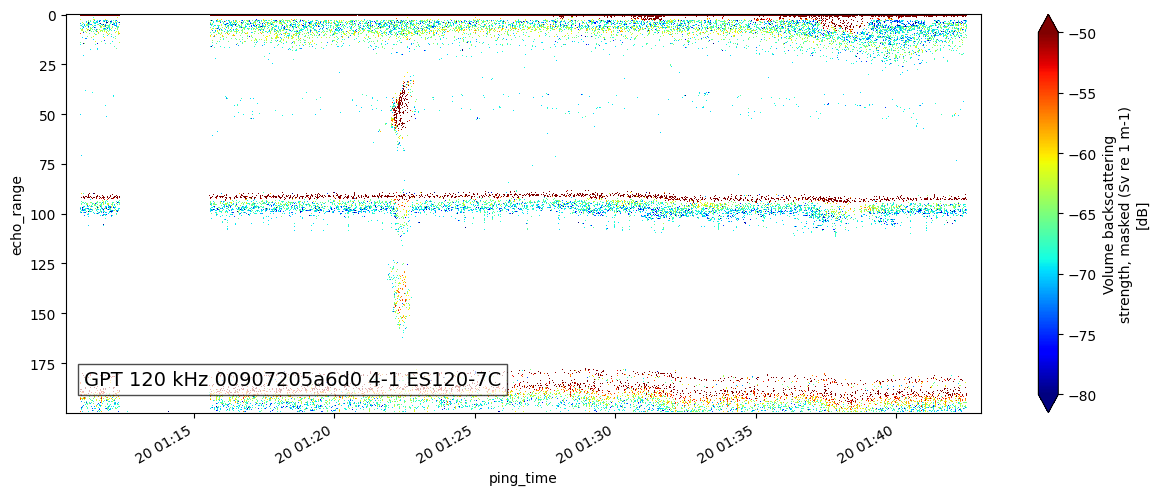

In [20]:
epviz.create_echogram(krill_ds_Sv_shoal_combined, vmin=-80, vmax=-50)